In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/me_cfs_vs_depression_dataset.csv


In [38]:
dataset = pd.read_csv("/kaggle/input/dataset/me_cfs_vs_depression_dataset.csv")

In [39]:
#analyzing the dataset
dataset.columns

Index(['age', 'gender', 'sleep_quality_index', 'brain_fog_level',
       'physical_pain_score', 'stress_level', 'depression_phq9_score',
       'fatigue_severity_scale_score', 'pem_duration_hours',
       'hours_of_sleep_per_night', 'pem_present', 'work_status',
       'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')

In [40]:
#understanding the data
dataset.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

In [42]:
dataset.isnull().sum()

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

In [43]:
#distribution of target variable
dataset['diagnosis'].value_counts()

diagnosis
Depression    401
ME/CFS        397
Both          202
Name: count, dtype: int64

In [44]:
dataset['age'].describe()
#middle aged people tend to be more prone

count    1000.000000
mean       44.385000
std        15.321669
min        18.000000
25%        31.750000
50%        45.000000
75%        57.000000
max        70.000000
Name: age, dtype: float64

In [45]:
dataset['gender'].value_counts()
#SLIGHT deviation towards men

gender
Male      524
Female    476
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='sleep_quality_index'>

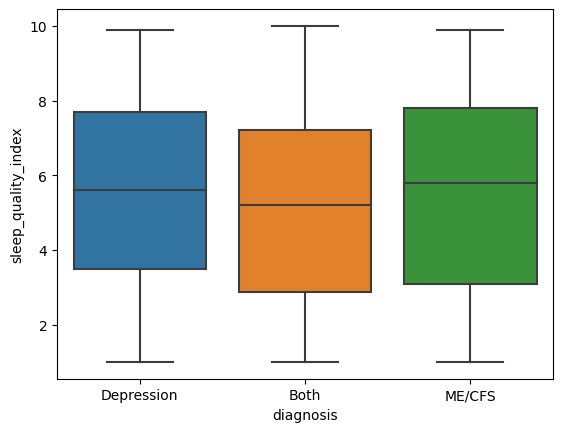

In [46]:
#dataset['sleep_quality_index'].describe()
import seaborn as sns
sns.boxplot(x = 'diagnosis', y = 'sleep_quality_index', data = dataset)
#people with ME/CFS have better sleep quality

<Axes: xlabel='diagnosis', ylabel='brain_fog_level'>

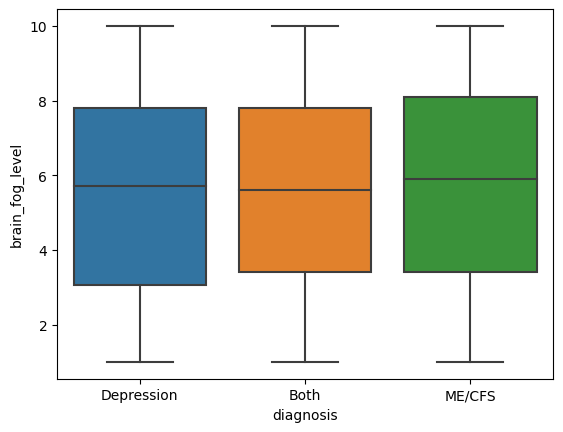

In [47]:
sns.boxplot(x = 'diagnosis', y = 'brain_fog_level', data = dataset)
#MAY not be a strong indicator, both groups have similar brain fog levels, ME/CFS are slightly higher

<Axes: xlabel='diagnosis', ylabel='physical_pain_score'>

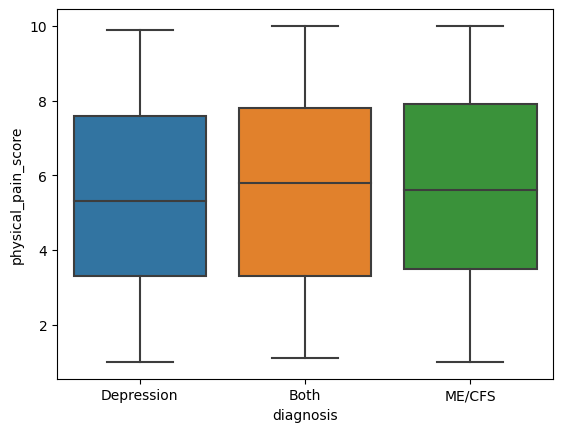

In [48]:
#physical_pain_score
sns.boxplot(x = 'diagnosis', y = 'physical_pain_score', data = dataset)

<Axes: xlabel='diagnosis', ylabel='stress_level'>

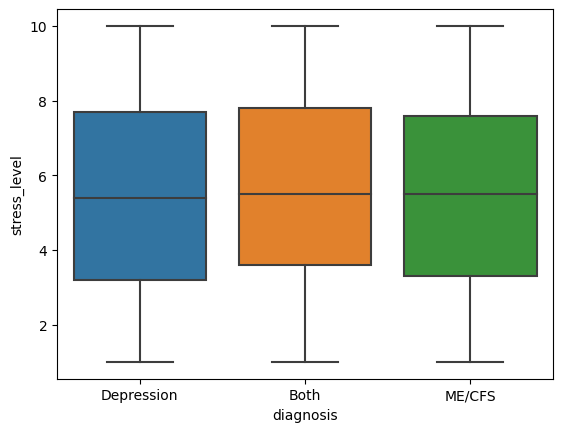

In [49]:
#stress_level
sns.boxplot(x = 'diagnosis', y = 'stress_level', data = dataset)

<Axes: xlabel='diagnosis', ylabel='depression_phq9_score'>

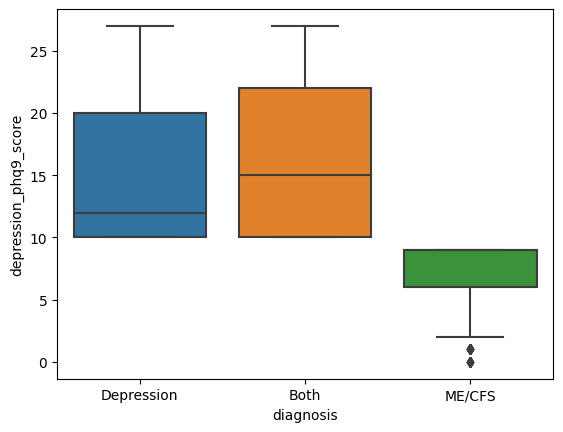

In [50]:
#depression_phq9_score
sns.boxplot(x = 'diagnosis', y = 'depression_phq9_score', data = dataset)

<Axes: xlabel='diagnosis', ylabel='fatigue_severity_scale_score'>

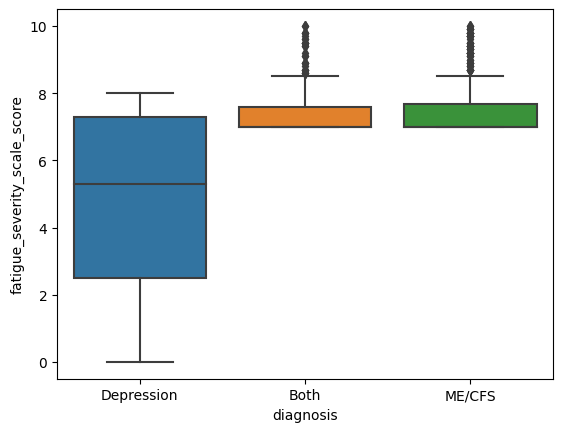

In [51]:
sns.boxplot(x = 'diagnosis', y = 'fatigue_severity_scale_score', data = dataset)

<Axes: xlabel='diagnosis', ylabel='pem_duration_hours'>

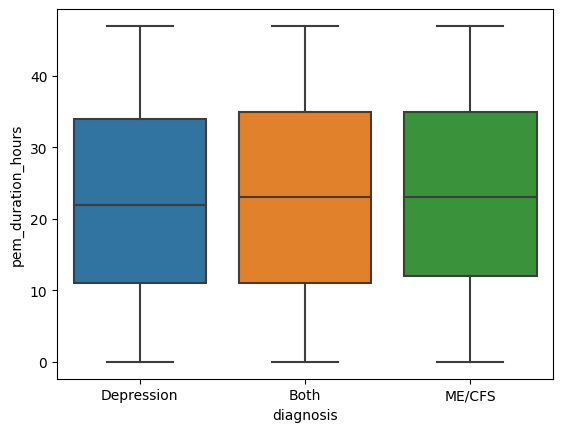

In [52]:
sns.boxplot(x = 'diagnosis', y = 'pem_duration_hours', data = dataset)

<Axes: xlabel='diagnosis', ylabel='hours_of_sleep_per_night'>

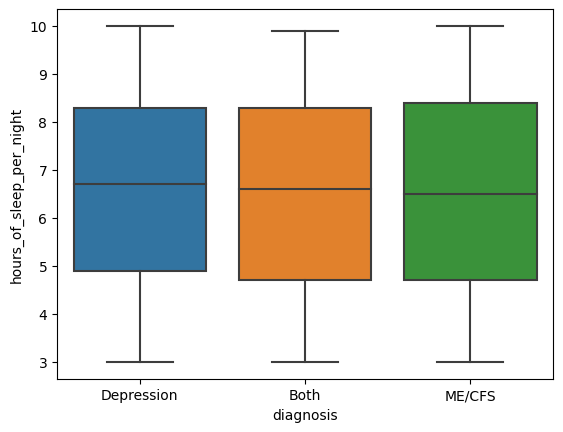

In [53]:
sns.boxplot(x = 'diagnosis', y = 'hours_of_sleep_per_night', data = dataset)

In [54]:
dataset['pem_present'].value_counts()
#balanced

pem_present
1    599
0    401
Name: count, dtype: int64

In [55]:
dataset['work_status'].value_counts()
#more people who are employed

work_status
Partially working    335
Working              320
Not working          298
Name: count, dtype: int64

In [56]:
dataset['social_activity_level'].value_counts()
#most people have decent social activity levels 

social_activity_level
Very low     203
High         200
Low          190
Very high    186
Medium       181
Name: count, dtype: int64

In [57]:
dataset['exercise_frequency'].value_counts()
#very few who exercise as a part of their routine

exercise_frequency
Rarely       210
Often        202
Daily        194
Sometimes    184
Never        171
Name: count, dtype: int64

In [58]:
dataset['meditation_or_mindfulness'].value_counts()
#deviation towards yes, slight

meditation_or_mindfulness
Yes    505
No     484
Name: count, dtype: int64

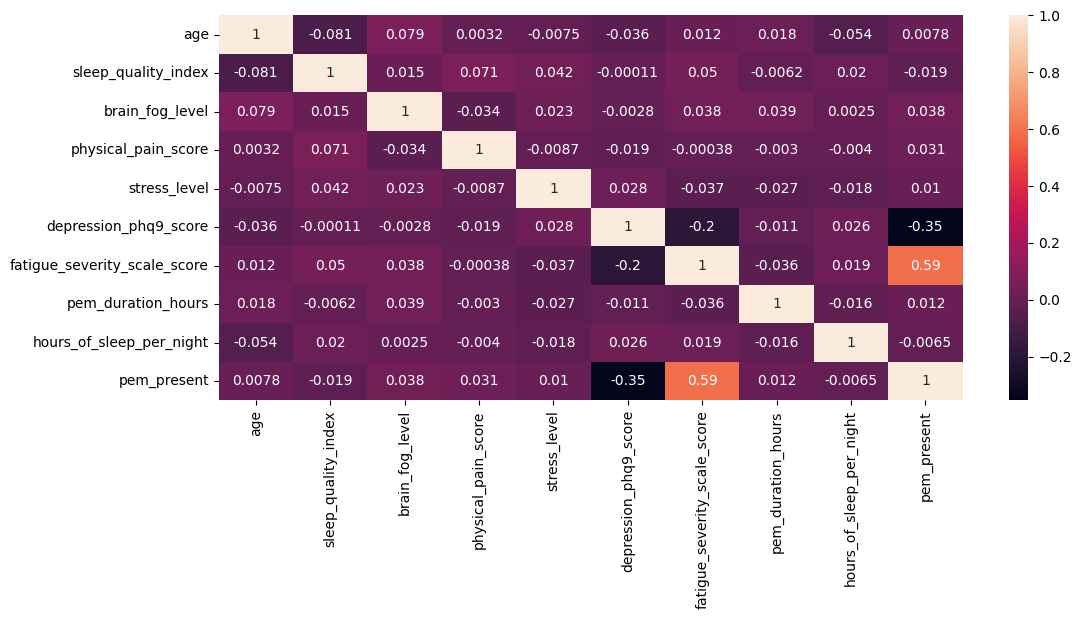

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = dataset.select_dtypes(include=['number'])
corr = num_col.corr()

plt.figure(figsize = (12, 5))
sns.heatmap(corr, annot=True)
plt.show()

In [60]:
# Numerical columns
num_cols = [
    'sleep_quality_index',
    'brain_fog_level',
    'physical_pain_score',
    'stress_level',
    'depression_phq9_score',
    'fatigue_severity_scale_score',
    'pem_duration_hours',
    'hours_of_sleep_per_night'
]

for col in num_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

In [61]:
# Categorical columns
cat_cols = [
    'work_status',
    'social_activity_level',
    'exercise_frequency',
    'meditation_or_mindfulness'
]

for col in cat_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [62]:
dataset.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

In [63]:
#dealing with categorical variables
#ordinal encoding
exercise_order = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Daily': 4
}


dataset['exercise_frequency'] = dataset['exercise_frequency'].map(exercise_order)


In [64]:
social_activity_order = {
    'Very low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very high': 4
}

dataset['social_activity_level'] = dataset['social_activity_level'].map(social_activity_order)

In [65]:
#one hot encoding
dataset = pd.get_dummies(dataset, columns = ['gender', 'meditation_or_mindfulness'], drop_first = True)

In [66]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['work_status'] = le.fit_transform(dataset['work_status'])

In [67]:
dataset.dtypes

age                                int64
sleep_quality_index              float64
brain_fog_level                  float64
physical_pain_score              float64
stress_level                     float64
depression_phq9_score            float64
fatigue_severity_scale_score     float64
pem_duration_hours               float64
hours_of_sleep_per_night         float64
pem_present                        int64
work_status                        int64
social_activity_level              int64
exercise_frequency                 int64
diagnosis                         object
gender_Male                         bool
meditation_or_mindfulness_Yes       bool
dtype: object

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.995

Confusion Matrix:
 [[39  0  0]
 [ 0 83  0]
 [ 1  0 77]]

Classification Report:
               precision    recall  f1-score   support

        Both       0.97      1.00      0.99        39
  Depression       1.00      1.00      1.00        83
      ME/CFS       1.00      0.99      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



                          Feature  Importance
5           depression_phq9_score    0.377698
9                     pem_present    0.366953
6    fatigue_severity_scale_score    0.122169
3             physical_pain_score    0.017507
1             sleep_quality_index    0.016649
4                    stress_level    0.015458
2                 brain_fog_level    0.015258
8        hours_of_sleep_per_night    0.015094
0                             age    0.014264
7              pem_duration_hours    0.013327
12             exercise_frequency    0.008165
11          social_activity_level    0.007811
10                    work_status    0.004592
14  meditation_or_mindfulness_Yes    0.002576
13                    gender_Male    0.002478


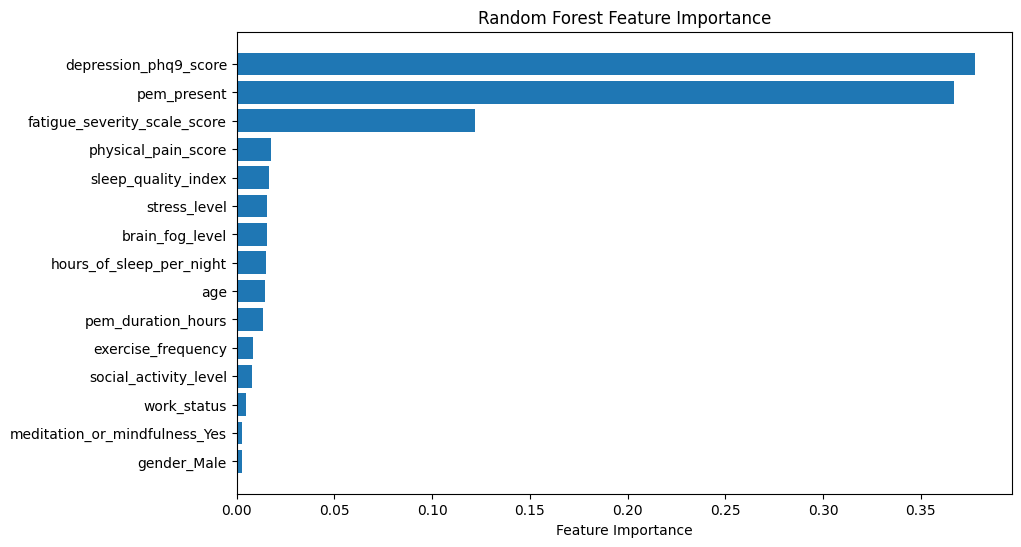

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create dataframe for easy viewing
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display table
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()